In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
pip install downcast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from downcast import reduce
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.cm as cm
import warnings 
warnings.filterwarnings("ignore")
import gc

###Importing datasets

####Calendar

In [4]:
calendar = pd.read_csv('/drive/My Drive/calendar.csv')

In [5]:
calendar.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0


Description of columns:

date: The date in a 'YYYY-MM-DD' format.

wm_yr_wk: The id of the week the date belongs to.

weekday: The day of the week of the date

wday: The id of the weekday, starting from Saturday. Saturday --> 1 , sunday --> 2 and so on

month: The month of the date.

year: The year of the date.

event_name_1: If the date includes an event, the name of this event.

event_type_1: If the date includes an event, the type of this event.

event_name_2: If the date includes a second event, the name of this event.

event_type_2: If the date includes a second event, the type of this event.

snap_CA, snap_TX, and snap_WI: A binary variable (0 or 1) indicating   whether the stores of CA, TX or WI allow SNAP purchases on the examined date. 1 indicates that SNAP purchases are allowed


In [6]:
calendar.columns[calendar.isna().any()].tolist()
print(calendar.isnull().sum(axis = 0))

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64


There are many Nan values in event_name_1, event_type_1, event_name_2, event_type_2 columns.

In [7]:
#Replacing rows with Nan value with 'no_event'
calendar=calendar.fillna('no_event')
calendar.columns[calendar.isna().any()].tolist()

[]

In [8]:
#Downcasting the dataframes to reduce the amount of storage used
calendar=reduce(calendar)
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   int8          
 4   month         1969 non-null   int8          
 5   year          1969 non-null   int16         
 6   d             1969 non-null   category      
 7   event_name_1  1969 non-null   category      
 8   event_type_1  1969 non-null   category      
 9   event_name_2  1969 non-null   category      
 10  event_type_2  1969 non-null   category      
 11  snap_CA       1969 non-null   int8          
 12  snap_TX       1969 non-null   int8          
 13  snap_WI       1969 non-null   int8          
dtypes: category(6), datetime64[ns](1), int16(2), int8(5)
memory usage: 128.4 KB


In [9]:
calendar.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0


*   There are 1969 rows in calendar dataframe where 1913 rows corresponds to 29th Jan 2011 to 24th April 2016. We need to predict the sales of next 28 days i.e., 25th April 2016 to 22nd May 2016. The rest of the rows need not be used as they are specific to M5 competition held on kaggle.
*   Since this is a time series forecasting problem, we can use the 'date' column for splitting train,CV and test datasets
*   There are 14 columns in calendar table.The columns event_name_1,event_type_1 have data in 162 rows and event_name_2,event_type_2 have data in 5 rows and the values in rest of the rows are NULL. Other columns do not have any NULL values. We have replaced the NULL values with the value - 'no_event'



In [10]:
#deleting the rows which has data after 22nd May 2016 i.e, days after 1941 
calendar = calendar[(calendar['date'] <= '2016-05-22')]

#####Sales dataset

In [11]:
sales_train_eval = pd.read_csv('/drive/My Drive/sales_train_evaluation.csv')
sales_train_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [12]:
#Downcasting the dataframes to reduce the amount of storage used
sales_train_eval=reduce(sales_train_eval)
#Checking if any null or Nan values are present 
sales_train_eval.columns[sales_train_eval.isna().any()].tolist()

[]

In [13]:
pd.set_option('expand_frame_repr', False) #code to display all the columns in a single row
sales_train_eval.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: category(6), int16(1317), int8(624)
memory usage: 96.3 MB


In [14]:
print(sales_train_eval.head(5))

                              id        item_id    dept_id   cat_id store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0    0  ...       2       4       0       0       0       0       3       3       0       1
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0    0  ...       0       1       2       1       1       0       0       0       0       0
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0    0  ...       1       0       2       0       0       0       2       3       0       1
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1       CA    0    0    0    0  ...       1       1       0       4       0       1       3       0       2       6
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_0

Columns description

item_id: The id of the product.

dept_id: The id of the department the product belongs to.

cat_id: The id of the category the product belongs to.

store_id: The id of the store where the product is sold.

state_id: The state where the store is located.

d_1, d_2, …, d_i, … d_1941: The number of units sold at day i, starting from 2011-01-29
*   There are 30490 rows in sales_train_evaluation dataframe. Each entry corresponds to the sales data of an item,in each department and category sold at a given store and particular state
*   There are no NULL values in dataframe.

In [15]:
#Code to display the information on state,store,category,department and item columns
print('Items:',len(sales_train_eval['item_id'].unique()))
print('Department:',len(sales_train_eval['dept_id'].unique()))
print('Categories:',list(sales_train_eval['cat_id'].unique()))
print('Store:',list(sales_train_eval['store_id'].unique()))
print('State:',list(sales_train_eval['state_id'].unique()))

Items: 3049
Department: 7
Categories: ['HOBBIES', 'HOUSEHOLD', 'FOODS']
Store: ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
State: ['CA', 'TX', 'WI']




*   There are 3049 unique items sold at 10 different stores so we have (3049*10)=30490 number of rows in dataframe
*  There are 3 states California,Texas, Wiscosin. California has 4 stores and Texas, Wisconsin have 3 stores each
*  There are 3 categories FOODS,HOUSEHOLD,HOBBIES
*  Each category is divided into departments





In [16]:
#Code to display the different categories present in dataset and the number of unique items in each category
grp_category  = sales_train_eval.groupby('cat_id')

for cat,ele in grp_category:
    g_cat=grp_category.get_group(cat)
    print('Total number of items in',cat,'category are',g_cat.shape[0])

Total number of items in FOODS category are 14370
Total number of items in HOBBIES category are 5650
Total number of items in HOUSEHOLD category are 10470


In [17]:
#Below code displays the different departments under each category and the number of unique items in each department
grp_dept  = sales_train_eval.groupby('dept_id')

for dept,ele in grp_dept:
    g_dept=grp_dept.get_group(dept)
    print('Total number of unique items in',dept,'department are',g_dept.shape[0])

Total number of unique items in FOODS_1 department are 2160
Total number of unique items in FOODS_2 department are 3980
Total number of unique items in FOODS_3 department are 8230
Total number of unique items in HOBBIES_1 department are 4160
Total number of unique items in HOBBIES_2 department are 1490
Total number of unique items in HOUSEHOLD_1 department are 5320
Total number of unique items in HOUSEHOLD_2 department are 5150


In [18]:
#Below code displays the data available for each state and different stores present in each state
grp_state_store  = sales_train_eval.groupby(['state_id','store_id'])

for state,ele in grp_state_store:
    g_state=grp_state_store.get_group(state)
    print(state,g_state.shape[0])

('CA', 'CA_1') 3049
('CA', 'CA_2') 3049
('CA', 'CA_3') 3049
('CA', 'CA_4') 3049
('TX', 'TX_1') 3049
('TX', 'TX_2') 3049
('TX', 'TX_3') 3049
('WI', 'WI_1') 3049
('WI', 'WI_2') 3049
('WI', 'WI_3') 3049




*   CA has 4 stores where as Texas and Wisconsin has only 3 stores.
*   The dataset has 3049 rows corresponding to each store. Since CA has 4 stores, it has more records in the dataset





In [19]:
del grp_state_store
del grp_category
del grp_dept

gc.collect()

132

#####Price dataframe

In [20]:
sell_price = pd.read_csv('/drive/My Drive/sell_prices.csv')

In [21]:
#Downcasting the dataframes to reduce the amount of storage used
sell_price=reduce(sell_price)
sell_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    int16   
 3   sell_price  float16 
dtypes: category(2), float16(1), int16(1)
memory usage: 45.8 MB


In [22]:
sell_price.head(5)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.578125
1,CA_1,HOBBIES_1_001,11326,9.578125
2,CA_1,HOBBIES_1_001,11327,8.257812
3,CA_1,HOBBIES_1_001,11328,8.257812
4,CA_1,HOBBIES_1_001,11329,8.257812



Description of columns:

store_id: The id of the store where the product is sold.

item_id: The id of the product.

wm_yr_wk: The id of the week.

sell_price: The average price of the product for the given week at the given store



In [23]:
print(sell_price.tail())
sell_price.columns[sell_price.isna().any()].tolist()

        store_id      item_id  wm_yr_wk  sell_price
6841116     WI_3  FOODS_3_827     11617         1.0
6841117     WI_3  FOODS_3_827     11618         1.0
6841118     WI_3  FOODS_3_827     11619         1.0
6841119     WI_3  FOODS_3_827     11620         1.0
6841120     WI_3  FOODS_3_827     11621         1.0


[]



1.   There are 6841121 rows in the dataframe where each row corresponds to the average price of an item at a store for the given week
2.   There are 4 columns with no NULL or Nan values
3.   The data is present till week_id 11621 which corresponds to 19th June 2016. 



**Merging calendar data with sales_train_eval dataset. We first pivot sales_train_eval data and then merge with calendar data so that each  column d_1 to d_1941 in sales_train_eval corresponds to the date in calendar data**

In [24]:
#dataframe is pivoted to have all the sales data under a single column
sales_final=sales_train_eval.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 
                                           'store_id', 'state_id'], var_name='d',value_name='sales')

In [25]:
sales_final['d']=sales_final['d'].astype('category')

In [26]:
#merging sales data with calendar data to plot total sales per day(in terms of date)
sales_final=sales_final.merge(calendar,on='d',how='left')

In [27]:
pd.options.display.max_columns = None
sales_final.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0


The dataframe sales_final has 58 million rows. We can randomly sample 20 million rows from the dataframe to perform EDA so as to avoid memory issues. 



In [28]:
#Sample 20 million rows out of 56 million to perform EDA
sales_final = sales_final.sample(n=20000000)

In [29]:
sales_final.isnull().values.any()

False

Merging the above created sales_final dataframe with sell_price dataframe

In [30]:
#Merging with price dataframe
sales_final=sales_final.merge(sell_price,on=['wm_yr_wk','item_id','store_id'],how='left')
sales_final.isnull().values.any()

True

In [31]:
sales_final['sell_price'].isna().sum()

4155335

Note that there are no Nan or NULL values in sell_prices dataframe. But after we merged the data with sales_final which contains calendar and sales_train_evaluation data Nan values are present in dataframe. This might be because the product is missing from the stores in that week. 

#### Analysis on Missing products in stock

In [32]:
#count of items and missing items in each department
fig = make_subplots(rows=1, cols=2,subplot_titles=('Count of items in each department',
                                                   'perc of missing items in stock in each department'))
grp_dept = sales_final.groupby(['dept_id'])

lst_dept = []
count=[]

for dept,ele in grp_dept:
    g_dept=grp_dept.get_group(dept)
    lst_dept.append(dept)
    count.append(g_dept.shape[0])

department = []
perc_missing_value = []

for dept,ele in grp_dept.groups.items():
    df_temp = sales_final.loc[sales_final['dept_id']==dept]
    department.append(dept)
    perc_missing_value.append((df_temp.loc[ele]['sell_price'].isnull().sum()*100)/len(df_temp.loc[ele]))

# plot data
fig.add_trace(
    go.Bar(x=lst_dept, y=count) ,row=1, col=1
           )
fig.add_trace(
    go.Bar(x=department, y=perc_missing_value),row=1, col=2
)

fig.update_layout(
    height=400, 
    width=800,
)

fig.update_xaxes(
        tickangle = 90)

fig.show()

*   Items in FOODS_3 department and HOUSEHOLD_1 are more in number.
*   Highest number of missing items belong to  FOODS_2 department.
*   Even if items in FOODS_3 department are more in quantity, the number of missing items from stores are relatively less
*   Percentage of items missing in HOUSEHOLD and HOBBIES are almost same.
*   Even when the count of items in HOBBIES category are less many items in HOBBIES category are not in stock. 

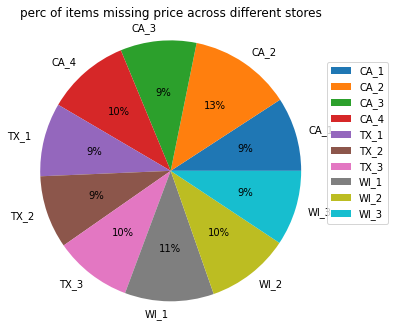

In [33]:
grp_store =sales_final.groupby(['store_id'])
stores = []
perc_missing_value = []

for store,ele in grp_store.groups.items():
    df_temp = sales_final.loc[sales_final['store_id']==store]
    stores.append(store)
    perc_missing_value.append((df_temp.loc[ele]['sell_price'].isnull().sum()*100)/len(df_temp.loc[ele]))

plt.pie(perc_missing_value,labels=stores,autopct='%.0f%%',radius=1.5)
plt.legend(bbox_to_anchor=(1.5, 1), borderaxespad=0.)
plt.title('perc of items missing price across different stores',pad=45)

plt.show()

*   Items in CA_2 store has price value missing which means more items are not in stock in CA_2 store
*   Other stores have approximately same amount of items not present in stock.


In [34]:
print(round(sales_final['sell_price'].describe(),2))

count    15844665.00
mean             NaN
std             0.00
min             0.01
25%             2.18
50%             3.47
75%             5.84
max           107.31
Name: sell_price, dtype: float64



*   There is a huge gap between 75th percentile and max value. There seems to be outliers in the dataset
*   As we have seen earlier, Nan values are present for sell_price column.This is the reason mean=Nan

In [35]:
#Below code displays the data available for each state and different stores present in each state
grp_cat  = sales_final.groupby(['cat_id']).agg({'sell_price':['mean','min','max','median']})

print(grp_cat)

          sell_price                                
                mean       min         max    median
cat_id                                              
FOODS       3.248047  0.010002   19.484375  2.679688
HOBBIES     5.328125  0.010002   30.984375  3.970703
HOUSEHOLD   5.464844  0.010002  107.312500  4.941406


Replacing Nan values with median of the product's category.Since there are outliers in dataset, we would consider median for imputation.

In [36]:
#Median imputation
sales_final['sell_price'].fillna(sales_final.groupby(['cat_id','item_id'])['sell_price'].transform('median'),
                              inplace=True)

In [37]:
#Adding a column 'revenue' in dataframe for analysis
sales_final['revenue'] = sales_final['sell_price'] * sales_final['sales']

In [38]:
sales_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000000 entries, 0 to 19999999
Data columns (total 23 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             object        
 7   sales         int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
 21  sell_price    float16       
 22  revenue       float32       
dtypes: category(11), datetime64[ns

In [39]:
del sales_train_eval
del calendar
del sell_price

gc.collect()

4174

In [40]:
sales_final.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,revenue
0,HOUSEHOLD_1_480_CA_1_evaluation,HOUSEHOLD_1_480,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1133,0,2014-03-06,11405,Thursday,6,3,2014,no_event,no_event,no_event,no_event,1,1,1,2.769531,0.000000
1,HOBBIES_2_015_CA_4_evaluation,HOBBIES_2_015,HOBBIES_2,HOBBIES,CA_4,CA,d_900,0,2013-07-16,11325,Tuesday,4,7,2013,no_event,no_event,no_event,no_event,0,0,0,3.470703,0.000000
2,HOBBIES_1_143_TX_1_evaluation,HOBBIES_1_143,HOBBIES_1,HOBBIES,TX_1,TX,d_1934,1,2016-05-15,11616,Sunday,2,5,2016,no_event,no_event,no_event,no_event,0,1,1,7.980469,7.980469
3,HOUSEHOLD_1_221_CA_1_evaluation,HOUSEHOLD_1_221,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1281,2,2014-08-01,11426,Friday,7,8,2014,no_event,no_event,no_event,no_event,1,1,0,11.968750,23.937500
4,HOUSEHOLD_2_244_TX_2_evaluation,HOUSEHOLD_2_244,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,d_764,2,2013-03-02,11306,Saturday,1,3,2013,no_event,no_event,no_event,no_event,1,0,1,3.980469,7.960938


###Analysis on sales 

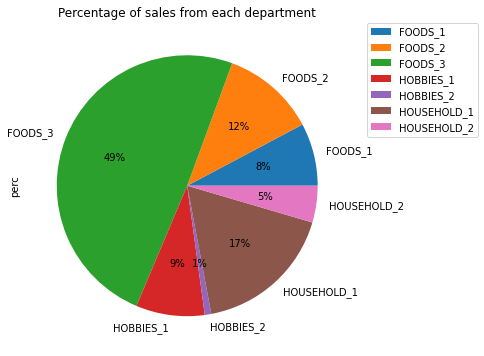

In [41]:
#department wise sales

df =sales_final.groupby(['dept_id'],as_index=True,sort=True).agg(total_sales=('sales',np.sum))
df['perc']=df['total_sales']/sum(df['total_sales'].values)*100
df.plot.pie(y='perc',figsize=(6,6),autopct='%.0f%%',title='Percentage of sales from each department')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

del df

*   FOODS_3 department has highest sales followed by HOUSEHOLD_1.
*   Almost 70% of sales are from FOODS category
*   HOBBIES_2 has least sales

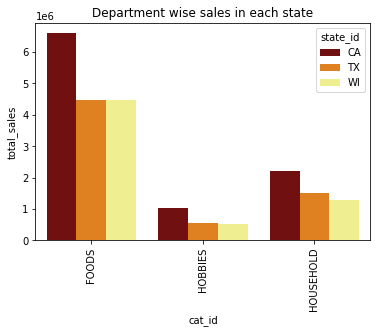

In [42]:
#sales per category and state

df =sales_final.groupby(['cat_id','state_id'],as_index=False,sort=True).agg(total_sales=('sales',np.sum))
fig=sns.barplot(x = 'cat_id', y='total_sales', hue='state_id', data=df,palette='afmhot')
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
plt.xticks(rotation=90)
plt.title('Department wise sales in each state')
plt.show()
del df


In [43]:
sales_final['total_sales'] = sales_final.sum(axis=1)

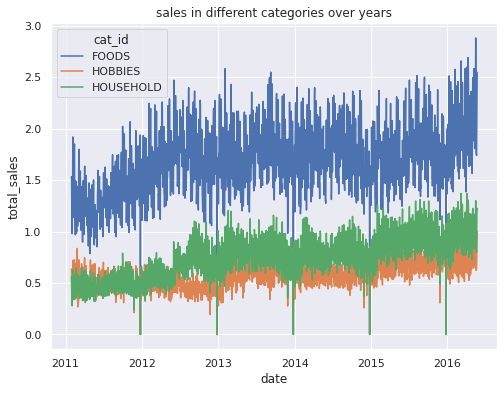

In [44]:
df = sales_final.groupby(['date','cat_id'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
sns.set(rc={"figure.figsize":(8, 6)})
sns.lineplot(x='date',y='total_sales',data=df,hue='cat_id').set(title="sales in different categories over years")

del df

*   Sales have a smooth upward trend through the years for items Foods and Household category
*   Sales have not increased much for items in HOBBIES

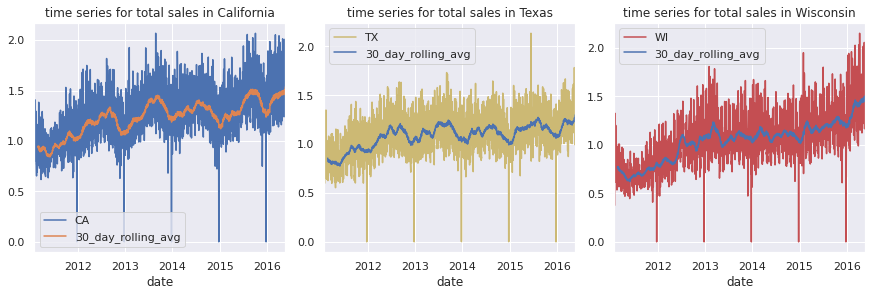

In [45]:
#yearly sales across categories
df = pd.DataFrame()

df = sales_final[['date','state_id','sales','revenue']].copy()
fig, axes = plt.subplots(nrows=1, ncols=3,constrained_layout=True)

df_CA = df.loc[(df['state_id'] == 'CA')].copy()
df_TX = df.loc[(df['state_id'] == 'TX')].copy()
df_WI = df.loc[(df['state_id'] == 'WI')].copy()

df_CA_sales = df_CA.groupby(['date'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df_TX_sales = df_TX.groupby(['date'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df_WI_sales = df_WI.groupby(['date'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))

df_CA_sales['30_day_rolling_avg'] = df_CA_sales.total_sales.rolling(30).mean()
df_TX_sales['30_day_rolling_avg'] = df_TX_sales.total_sales.rolling(30).mean()
df_WI_sales['30_day_rolling_avg'] = df_WI_sales.total_sales.rolling(30).mean()

df_CA_sales.plot(kind='line',x='date',y='total_sales',ylabel='',figsize=(12,4),title = 'time series for total sales in California',ax=axes[0],label='CA')
df_CA_sales.plot(kind='line',x='date', y='30_day_rolling_avg',ax=axes[0])
df_TX_sales.plot(kind='line',x='date',y='total_sales',figsize=(12,4),title = 'time series for total sales in Texas',ax=axes[1],color='y',label='TX')
df_TX_sales.plot(kind='line',x='date', y='30_day_rolling_avg',ax=axes[1])
df_WI_sales.plot(kind='line',x='date',y='total_sales',ylabel='',figsize=(12,4),title = 'time series for total sales in Wisconsin',ax=axes[2],color='r',label='WI')
df_WI_sales.plot(kind='line',x='date', y='30_day_rolling_avg',ax=axes[2])

plt.show()




*   There is a steady growth in sales in CA state as compared to TX and WI
*   The sales in TX has a rough linear trend. 
*   The sales in WI were less in earlier years as compared to TX but have picked up fast by the year 2016.
*   The total sales are zero on a particular day at the end of the year in all states





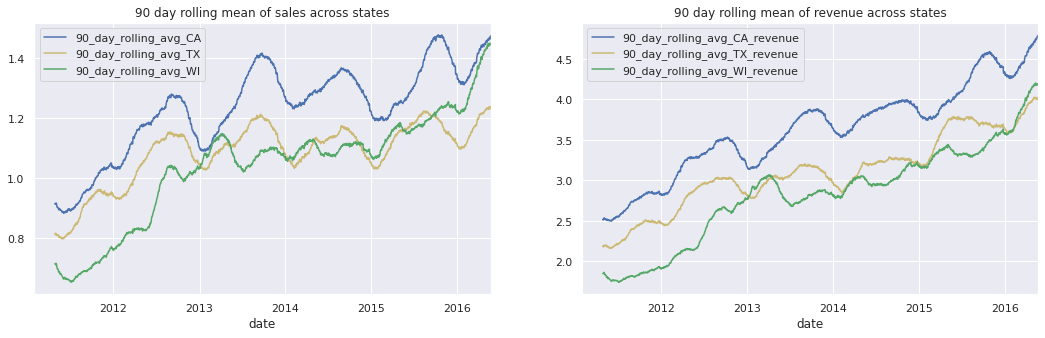

In [46]:
#sales and revenue data across three states through the years

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,5))

df_CA_sales['90_day_rolling_avg_CA' ] = df_CA_sales.total_sales.rolling(90).mean()
df_TX_sales['90_day_rolling_avg_TX' ] = df_TX_sales.total_sales.rolling(90).mean()
df_WI_sales['90_day_rolling_avg_WI' ] = df_WI_sales.total_sales.rolling(90).mean()

df_CA_sales.plot(kind='line',x='date', y='90_day_rolling_avg_CA',title='90 day rolling mean of sales across states',ax=ax1)
df_TX_sales.plot(kind='line',x='date', y='90_day_rolling_avg_TX',color='y',ax=ax1)
df_WI_sales.plot(kind='line',x='date', y='90_day_rolling_avg_WI',color='g',ax=ax1)

df_CA_revenue = df_CA.groupby(['date'],as_index=False,sort=True).agg(total_revenue=('revenue',np.mean))
df_TX_revenue = df_TX.groupby(['date'],as_index=False,sort=True).agg(total_revenue=('revenue',np.mean))
df_WI_revenue = df_WI.groupby(['date'],as_index=False,sort=True).agg(total_revenue=('revenue',np.mean))

df_CA_revenue['90_day_rolling_avg_CA_revenue' ] = df_CA_revenue.total_revenue.rolling(90).mean()
df_TX_revenue['90_day_rolling_avg_TX_revenue' ] = df_TX_revenue.total_revenue.rolling(90).mean()
df_WI_revenue['90_day_rolling_avg_WI_revenue' ] = df_WI_revenue.total_revenue.rolling(90).mean()

df_CA_revenue.plot(kind='line',x='date', y='90_day_rolling_avg_CA_revenue',title='90 day rolling mean of revenue across states',ax=ax2)
df_TX_revenue.plot(kind='line',x='date', y='90_day_rolling_avg_TX_revenue',color='y',ax=ax2)
df_WI_revenue.plot(kind='line',x='date', y='90_day_rolling_avg_WI_revenue',color='g',ax=ax2)

plt.show()

##Sales:

*   CA sold the most amount of items during the entire 5 year period
*   WI overtook TX in terms of the number of the items sold around July in 2015
*   There's some seasonality at play here with sales reaching a local max every 300-400 days
*   The mean value has an upward linear trend. The sales are oscillating at higher frequency every few interval.

##Revenue:

*   The revenue from CA state is significantly higher than other two states.
*   Even though WI overtook TX in sales the revenue difference from both the states is minimal.
*   The sales in TX has a rough linear trend but revenue has a slight upward trend. 




In [47]:
#store wise sales

df =sales_final.groupby(['store_id'],as_index=False,sort=True).agg(total_sales=('sales',np.sum))
fig=px.bar(df,x='store_id',y='total_sales',color='total_sales',color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(showlegend=False, title="Sales per store", title_x=0.5,width=700, height=400)
fig.show()




*   CA_3 store has highest sales followed by CA_1
*   CA_4 has least amount of sales

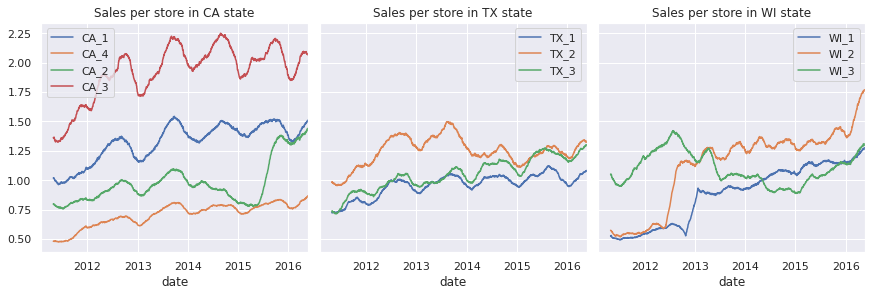

In [48]:
df = pd.DataFrame()

df = sales_final[['date','state_id','sales','store_id']].copy()
fig, axes = plt.subplots(nrows=1, ncols=3,constrained_layout=True,figsize=(12,5),sharey=True)

lst_states = df.state_id.unique()
lst_stores = df.store_id.unique()
lst=[]
dict1={}

for i in lst_states:
    lst=[]
    for j in lst_stores:
        if(i in j):
            lst.append(j)
    dict1[i] = lst

lst1 = list(dict1.keys())

k=0
for i in range(len(lst1)):
    lst_store = list(dict1[lst1[i]])
    for j in range(len(lst_store)):
        df_temp = pd.DataFrame()
        df_temp = df[df['store_id'] == str(lst_store[j])]
        df_temp2 = df_temp.groupby(['date'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
        df_temp2['store_id'] = lst_stores[i]
        df_temp2['90_day_rolling_avg'] = df_temp2.total_sales.rolling(90).mean()
        df_temp2.plot(kind='line',x='date',y='90_day_rolling_avg',ylabel='',figsize=(12,4),title = 'Sales per store in '+
                      lst1[i] + ' state',ax=axes[k],label=lst_store[j])
    k = k+1
        
plt.show()

*   Stores WI_1 and WI_2 have a drastic increase in sales in the year 2012. WI_3 store has a dip after 2012.
*   The CA stores are well separated in terms of sales. The sales in CA_1 and CA_3 almost have same pattern. CA_2 store has dip in sales in the year 2014 but recovered quickly by 2015. Sales in CA_3 are always high as compared to other stores.
*   The sales of stores in Texas are quite close to each other.Around beginning of 2014 store TX_3 sales have increased.







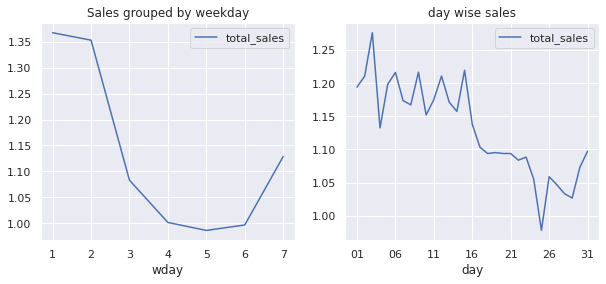

In [49]:
#Plotting daily and weekly sales trend

fig,(ax1,ax2) = plt.subplots(1,2)

df_week = sales_final.groupby(['wday'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))

df_day_of_month = sales_final[['date','sales']].copy()
df_day_of_month['day'] =  df_day_of_month['date'].dt.strftime("%d")
df_day_of_month = df_day_of_month.groupby(['day'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))

df_week.plot(kind='line',x='wday',y='total_sales',ylabel='',figsize=(10,4),title ='Sales grouped by weekday',ax=ax1)
df_day_of_month.plot(kind='line',x='day',y='total_sales',ylabel='',figsize=(10,4),title ='day wise sales',ax=ax2)

plt.show()



Sales as per weekday:

*   The sales are highest on saturday followed by sunday and friday.
*   There is a sudden dip in sales after sunday which continued till thursday

Sales as per day of month:

*   The sales are high for first half of month as compared to the second half.
*   The sales are least around 20th to 25th days and have slowly picked up by 28th.
*   The reason of this behaviour might be because of general salary cycle.





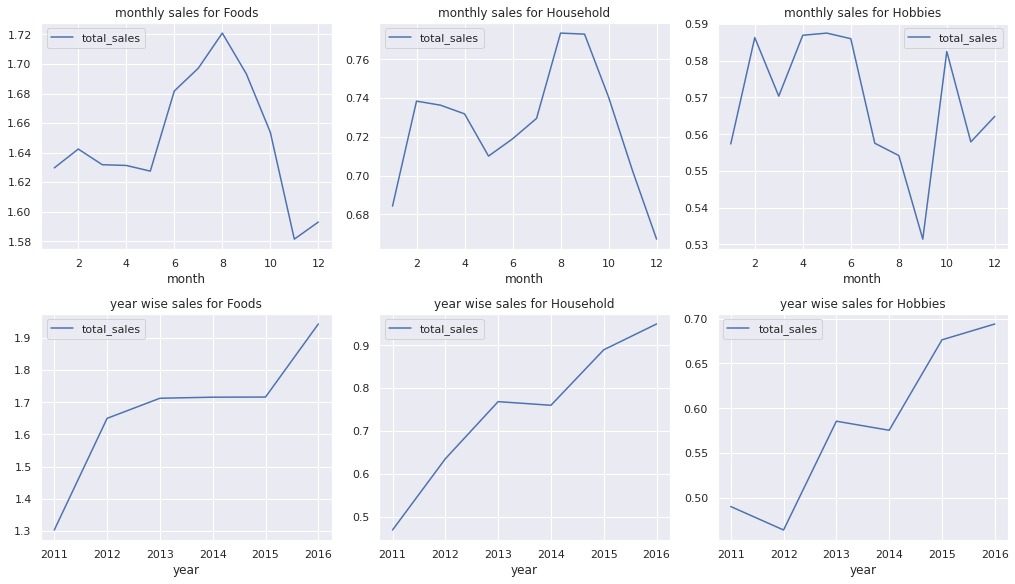

In [50]:
#monthly and yearly sales across categories
df = pd.DataFrame()

df = sales_final[['sales','cat_id','month','year']].copy()
fig, axes = plt.subplots(nrows=2, ncols=3,constrained_layout=True,figsize=(30, 15))

df_foods = df.loc[(df['cat_id'] == 'FOODS')].copy()
df_HH = df.loc[(df['cat_id'] == 'HOUSEHOLD')].copy()
df_HB = df.loc[(df['cat_id'] == 'HOBBIES')].copy()

df_per_month_foods = df_foods.groupby(['month'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df_per_year_foods = df_foods.groupby(['year'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))

df_per_month_HH = df_HH.groupby(['month'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df_per_year_HH = df_HH.groupby(['year'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))

df_per_month_HB = df_HB.groupby(['month'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df_per_year_HB = df_HB.groupby(['year'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))

df_per_month_foods.plot(kind='line',x='month',y='total_sales',ylabel='',figsize=(14,8),title = 'monthly sales for Foods',ax=axes[0,0])
df_per_month_HH.plot(kind='line',x='month',y='total_sales',figsize=(14,8),title = 'monthly sales for Household',ax=axes[0,1])
df_per_month_HB.plot(kind='line',x='month',y='total_sales',ylabel='',figsize=(14,8),title = 'monthly sales for Hobbies',ax=axes[0,2])

df_per_year_foods.plot(kind='line',x='year',y='total_sales',ylabel='',figsize=(14,8),title = 'year wise sales for Foods',ax=axes[1,0])
df_per_year_HH.plot(kind='line',x='year',y='total_sales',ylabel='',figsize=(14,8),title = 'year wise sales for Household',ax=axes[1,1])
df_per_year_HB.plot(kind='line',x='year',y='total_sales',ylabel='',figsize=(14,8),title = 'year wise sales for Hobbies',ax=axes[1,2])

plt.show()

#### Month wise sales
*   The sales for items in foods and household have steadily increased from may and are high in august. This might be because of summer vacation in the months june,july,august.
*   The sales for items in hobbies have a zig - zag pattern

#### Year wise sales

*   There is a steady increase in sales across years for all categories
*   There is no evident growth in sales between the years 2013 to 2014.The sales of items in HOBBIES department has gone down from 2013 to 2014. The sale of items in HOUSEHOLD has a linear trend between these years.

In [51]:
#Clearing up space by removing temporary dataframes loaded in memory

del fig
del axes
del df
del df_foods
del df_HH
del df_HB
del df_per_month_foods
del df_per_year_foods
del df_per_month_HH
del df_per_year_HH
del df_per_month_HB
del df_per_year_HB

gc.collect()

38750

In [52]:
del df_CA_sales
del df_TX_sales
del df_WI_sales
del df_CA
del df_TX
del df_WI
del df_CA_revenue
del df_TX_revenue
del df_WI_revenue
gc.collect()

15122

###Analysis on impact of Event and SNAP days on sales

In [53]:
#Event wise sales
df = sales_final.groupby(['event_type_1'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
fig=px.bar(df,x='event_type_1',y='total_sales',color='total_sales')
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside',width=0.25)
fig.update_layout(showlegend=False, title="Percent Sale on day basis", title_x=0.5,width=500, height=300)
fig.show()

*   Sales are slightly higher for sporting event than on days with no events.
*   National event days have least amount of sales

In [54]:
#sales based on number of events on a given day

df = sales_final[['sales','event_type_1','event_type_2']].copy()

df['num_of_events'] = np.NaN

df['num_of_events'] = np.where((df['event_type_1'] == 'no_event') & (df['event_type_2'] == 'no_event'),0,df['num_of_events'])
df['num_of_events'] = np.where((df['event_type_1'] != 'no_event') & (df['event_type_2'] == 'no_event'),1,df['num_of_events'])
df['num_of_events'] = np.where((df['event_type_1'] != 'no_event') & (df['event_type_2'] != 'no_event'),2,df['num_of_events'])

df = df.groupby(['num_of_events'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
fig=px.bar(df,x='num_of_events',y='total_sales',color='total_sales',color_continuous_scale=px.colors.sequential.Cividis_r)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside',width=0.25)
fig.update_layout(showlegend=False, title="Sales based on number of events on a given day", title_x=0.5,width=500, height=300)
fig.show()

Average sales are highest when there are 2 events.

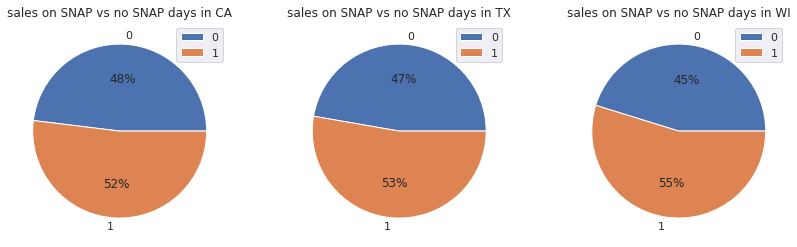

In [55]:
#sales on SNAP vs non-SNAP days

fig,(ax1,ax2,ax3) = plt.subplots(1,3)

plt.subplots_adjust(right=1.5)

df_CA = sales_final[sales_final['state_id'] == 'CA'][['snap_CA','sales','date']]

df_TX = sales_final[sales_final['state_id'] == 'TX'][['snap_TX','sales','date']]

df_WI = sales_final[sales_final['state_id'] == 'WI'][['snap_WI','sales','date']]

df = df_CA.groupby(['snap_CA'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df['perc'] = df['total_sales']/sum(df['total_sales'].values)*100
df.plot(kind='pie',x='snap_CA',y='perc',ylabel='',figsize=(8,4),title = 'sales on SNAP vs no SNAP days in CA',autopct='%.0f%%',ax=ax1)

df = df_TX.groupby(['snap_TX'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df['perc'] = df['total_sales']/sum(df['total_sales'].values)*100
df.plot(kind='pie',x='snap_TX',y='perc',ylabel='',figsize=(8,4),title = 'sales on SNAP vs no SNAP days in TX',autopct='%.0f%%',ax=ax2)

df = df_WI.groupby(['snap_WI'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
df['perc'] = df['total_sales']/sum(df['total_sales'].values)*100
df.plot(kind='pie',x='snap_WI',y='perc',ylabel='',figsize=(8,4),title = 'sales on SNAP vs no SNAP days in WI',autopct='%.0f%%',ax=ax3)



*   Sales on SNAP days are slightly higher than non-SNAP days
*   SNAP purchases have higher impact in WI state than TX and CA


In [56]:
#days in a month when its a SNAP day
df = pd.DataFrame()

df = sales_final[['date','state_id','snap_CA','snap_TX','snap_WI']].copy()

df_CA = df.loc[(df['state_id'] == 'CA')].copy()
df_TX = df.loc[(df['state_id'] == 'TX')].copy()
df_WI = df.loc[(df['state_id'] == 'WI')].copy()

df_CA['day'] =  df_CA['date'].dt.strftime("%d")
df_TX['day'] =  df_TX['date'].dt.strftime("%d")
df_WI['day'] =  df_WI['date'].dt.strftime("%d")

print("SNAP days in a month in California state",sorted(df_CA['day'][(df_CA['snap_CA'] == 1)].unique()))
print("SNAP days in a month in Texas state",sorted(df_TX['day'][(df_TX['snap_TX'] == 1)].unique()))
print("SNAP days in a month in Wisconsin state",sorted(df_WI['day'][(df_WI['snap_WI'] == 1)].unique()))

SNAP days in a month in California state ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
SNAP days in a month in Texas state ['01', '03', '05', '06', '07', '09', '11', '12', '13', '15']
SNAP days in a month in Wisconsin state ['02', '03', '05', '06', '08', '09', '11', '12', '14', '15']


SNAP days in all three states are present only in first 15 days of the month. This might be one of the reasons for higher sales during first half of month.

In [57]:
del df_CA
del df_TX
del df_WI

gc.collect()

6252

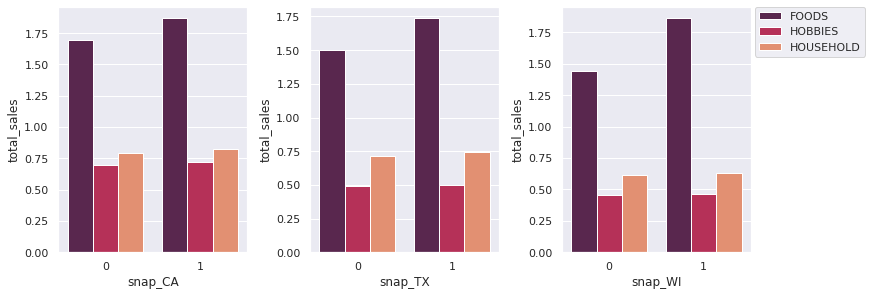

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=3,constrained_layout=True,figsize=(12,4))

df_CA = sales_final.loc[(sales_final['state_id'] == 'CA')].copy()
df_TX = sales_final.loc[(sales_final['state_id'] == 'TX')].copy()
df_WI = sales_final.loc[(sales_final['state_id'] == 'WI')].copy()

df = df_CA.groupby(['cat_id','snap_CA'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
fig=sns.barplot(x ='snap_CA', y='total_sales', hue='cat_id', data=df,palette='rocket',ax=axes[0])
fig.legend([],[],frameon=False)
df = df_TX.groupby(['cat_id','snap_TX'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
fig=sns.barplot(x ='snap_TX', y='total_sales', hue='cat_id', data=df,palette='rocket',ax=axes[1])
fig.legend([],[],frameon=False)
df = df_WI.groupby(['cat_id','snap_WI'],as_index=False,sort=True).agg(total_sales=('sales',np.mean))
sns.barplot(x ='snap_WI', y='total_sales', hue='cat_id', data=df,palette='rocket',ax=axes[2])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


*   FOODS item sales are high on SNAP days as compared to hobbies and household.
*   FOODS items sales are impacted more in Wisconsin state as compared to California and Texas

In [59]:
del df_TX
del df_CA
del df_WI

gc.collect()

110

###Analysis on how prices impact sales

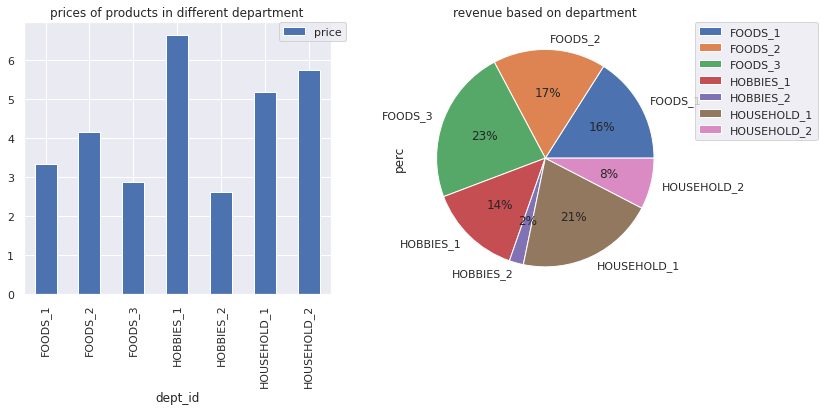

In [60]:
#Price vs Revenue of items in different departments
df=sales_final[['sell_price','dept_id','sales']].copy()
df['revenue'] = df['sell_price'] * df['sales']

df_temp1 = df[['sell_price','dept_id']]
df_temp2 = df[['revenue','dept_id']]

fig,(ax1,ax2) = plt.subplots(1,2)

plt.subplots_adjust(right=2)

df_temp1 = df_temp1.groupby(['dept_id'],as_index=True,sort=True).agg(price=('sell_price',np.mean))
df_temp1.plot.bar(y='price',figsize=(4,4),ax=ax1,title='prices of products in different department')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)

df_temp2 = df_temp2.groupby(['dept_id'],as_index=True,sort=True).agg(revenue=('revenue',np.mean))
df_temp2['perc']=df_temp2['revenue']/sum(df_temp2['revenue'].values)*100
df_temp2.plot.pie(y='perc',figsize=(5,5),autopct='%.0f%%',ax=ax2,title='revenue based on department')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)

plt.show()



*   Even though the price of items in FOODS catgeory are less,more than 50% of the revenue is from FOODS department
*   Household items have high price values as compared to items in FOODS category and HOBBIES_2. They contribute around 30% for the revenue
*   Even though HOBBIES_1 has less amount of sales, the revenue is comparitively higher this might be becuase of cost of items in HOBBIES_1



In [61]:

# We are creating a varibale with dates between two period and it's weekly for the X-axis in plot
a = pd.date_range(start='2011-01-29', end="2016-05-27", freq='W')
df_price = sales_final.groupby(['wm_yr_wk'],as_index=False,sort=True).agg(price=('sell_price',np.mean))

fig = px.line(x = a,y = df_price['price'],width=600,height=400)
fig.update_layout(title='Overall price change', xaxis_title='Years',yaxis_title='Cost Value', title_x=0.5)
fig.show()




*   There is only a minor difference in price of items over years.